##Abstract
In this notebook, a procedure is presented and applied to predict whether depression is present in patients. Different machine learning algorithms are used, which are compared with each other in terms of their performance at the end.

One machine learning model is trained with 2 different data sets per notebook. These 2 datasets were created in a previous data pre-processing step outside of this environment.

During data preprocessing, 4 data sets (Actigraphy data and socio-economic panel data from 2014 and 2016 respectively) were processed into a single data set by also using the generation of synthetic patients. Two different features of the original dataset were defined as classifiers:
- **BP_PHQ_9:** This refers to the 9th item of the PHQ9 assessment and relates to suicidality.
- **MH_PHQ_S:** Scale of the PHQ9 assessment (higher scores are associated with a higher probability of depression)

In addition, specific thresholds were used for the two classifiers.
- For **BP_PHQ_9**, with threshold of 1 = dataset 1
- For **MH_PHQ_S**, with threshold of 13 = Dataset 2

In the following, an outlook is provided to give some overview, how the procedure is built in order to achieve the machine learning application.

      
<br><br>

## Outlook
1. **Set up the environment**
2. **Load data into the environment**
3. **Data preparation**
   - Feature Extraction
       - Remove columns with non-numeric values
       - Address multicollinearity
   - Exploratory data analysis (e.g. check distributions and own errors)**
   - Balance data sets
4. **Machine learning**
   - Define necessary functions
       - Define evaluation metrics and plots
       - Define machine learning function
   - Call functions
       - Train and test the models
       - Generate evaluation metrics and plots for models


#1. Set up the environment

Setup environment by installing and importing packages

In [1]:
#%% Import packages and set up environment

!pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Load data into the environment

In [2]:
file_path_BP_PHQ_9_TH1 =  '/content/drive/My Drive/Colab Notebooks/Threshold_1_Operator_-_Depressionfeature_BP_PHQ_9_PercentofDataset_100.csv'
file_path_MH_PHQ_S_TH13 = '/content/drive/My Drive/Colab Notebooks/Threshold_13_Operator_-_Depressionfeature_MH_PHQ_S_PercentofDataset_100.csv'

# load different datasets into this environment as df's
df_BP_PHQ_9 = pd.read_csv(file_path_BP_PHQ_9_TH1)
df_MH_PHQ_S = pd.read_csv(file_path_MH_PHQ_S_TH13)

# show both df's
display("df_BP_PHQ_9", df_BP_PHQ_9)
display("df_MH_PHQ_S", df_MH_PHQ_S)

'df_BP_PHQ_9'

,ID_1,ID_2,group_id,SEX,AGE,HE_BMI,ID_COMBINED,d_PHQ,Depression,FEATURE_0,...,FEATURE_46,FEATURE_47,FEATURE_48,FEATURE_49,FEATURE_50,FEATURE_51,FEATURE_52,FEATURE_53,FEATURE_54,FEATURE_55
0,B237760415,C243704315,Female_[34-38]_Healthy Weight,Female,[34-38],Healthy Weight,B237760415C243704315,0.0,0,5.205929,...,-0.397639,-0.397646,2.306194,-0.397646,-0.397641,-0.397646,2.564530,-0.397646,-0.397642,-0.397646
1,A214765516,A231823312,Female_[54-58]_Healthy Weight,Female,[54-58],Healthy Weight,A214765516A231823312,0.0,0,5.311490,...,-0.421627,-0.421631,1.290862,-0.421632,-0.421628,-0.421631,1.493238,-0.421632,-0.421629,-0.421631
2,F655177903,H241763814,Female_[19-23]_Healthy Weight,Female,[19-23],Healthy Weight,F655177903H241763814,0.0,0,3.808431,...,-0.440641,-0.440649,2.099064,-0.440649,-0.440644,-0.440649,1.907093,-0.440649,-0.440646,-0.440649
3,H220794415,H204736615,Female_[34-38]_Healthy Weight,Female,[34-38],Healthy Weight,H220794415H204736615,0.0,0,2.701386,...,-0.445390,-0.445397,2.066844,-0.445397,-0.445392,-0.445397,2.191618,-0.445397,-0.445394,-0.445396
4,A223717915,H210712815,Female_[54-58]_Healthy Weight,Female,[54-58],Healthy Weight,A223717915H210712815,0.0,0,5.753521,...,-0.398659,-0.398663,1.261476,-0.398663,-0.398660,-0.398663,2.233848,-0.398663,-0.398661,-0.398663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,H214707715,B237794415,Female_[49-53]_overweight,Female,[49-53],overweight,H214707715B237794415,9.0,1,5.396629,...,-0.428404,-0.428408,1.307560,-0.428408,-0.428405,-0.428408,1.376272,-0.428408,-0.428406,-0.428408
636,G653308802,E241811415,Female_[54-58]_Healthy Weight,Female,[54-58],Healthy Weight,G653308802E241811415,9.0,1,6.506755,...,-0.343778,-0.343780,0.967522,-0.343781,-0.343779,-0.343780,0.679287,-0.343781,-0.343779,-0.343780
637,E241811415,C656281603,Female_[54-58]_Healthy Weight,Female,[54-58],Healthy Weight,E241811415C656281603,9.0,1,5.707973,...,-0.405054,-0.405059,1.291559,-0.405059,-0.405055,-0.405059,1.493592,-0.405059,-0.405056,-0.405059
638,B660310502,E241811415,Female_[54-58]_Healthy Weight,Female,[54-58],Healthy Weight,B660310502E241811415,9.0,1,4.626791,...,-0.463773,-0.463778,1.156152,-0.463778,-0.463775,-0.463778,1.467099,-0.463778,-0.463775,-0.463778


'df_MH_PHQ_S'

,ID_1,ID_2,group_id,SEX,AGE,HE_BMI,ID_COMBINED,d_PHQ,Depression,FEATURE_0,...,FEATURE_46,FEATURE_47,FEATURE_48,FEATURE_49,FEATURE_50,FEATURE_51,FEATURE_52,FEATURE_53,FEATURE_54,FEATURE_55
0,O237802915,K244777415,Female_[54-58]_Healthy Weight,Female,[54-58],Healthy Weight,O237802915K244777415,0.0,0,5.605602,...,-0.406851,-0.406856,1.426472,-0.406856,-0.406852,-0.406856,1.399759,-0.406856,-0.406853,-0.406856
1,O661324102,C237804616,Female_[59-65]_Healthy Weight,Female,[59-65],Healthy Weight,O661324102C237804616,0.0,0,6.559511,...,-0.341541,-0.341544,0.986295,-0.341544,-0.341541,-0.341544,1.474644,-0.341544,-0.341542,-0.341544
2,A219717915,O654308802,Female_[39-43]_Healthy Weight,Female,[39-43],Healthy Weight,A219717915O654308802,0.0,0,2.776117,...,-0.419378,-0.419389,3.398386,-0.419389,-0.419381,-0.419389,3.647138,-0.419390,-0.419383,-0.419389
3,N239741715,D244775714,Female_[34-38]_Healthy Weight,Female,[34-38],Healthy Weight,N239741715D244775714,0.0,0,4.155495,...,-0.453393,-0.453399,1.512401,-0.453399,-0.453395,-0.453399,1.377323,-0.453399,-0.453397,-0.453399
4,J242743416,H206799514,Male_[29-33]_overweight,Male,[29-33],overweight,J242743416H206799514,0.0,0,5.935491,...,-0.371027,-0.371032,1.653041,-0.371032,-0.371028,-0.371032,2.264254,-0.371032,-0.371029,-0.371032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,L657188101,O239736616,Male_[59-65]_Healthy Weight,Male,[59-65],Healthy Weight,L657188101O239736616,27.0,1,5.058712,...,-0.445561,-0.445567,1.349662,-0.445567,-0.445563,-0.445567,1.683226,-0.445567,-0.445564,-0.445567
1116,L657188101,M244791016,Male_[59-65]_Healthy Weight,Male,[59-65],Healthy Weight,L657188101M244791016,27.0,1,6.402835,...,-0.361271,-0.361273,0.883975,-0.361273,-0.361272,-0.361273,1.016474,-0.361273,-0.361272,-0.361273
1117,L657188101,L240740016,Male_[59-65]_Healthy Weight,Male,[59-65],Healthy Weight,L657188101L240740016,27.0,1,4.651101,...,-0.429933,-0.429941,2.331739,-0.429942,-0.429935,-0.429941,2.600286,-0.429942,-0.429937,-0.429941
1118,C238738316,L657188101,Male_[59-65]_Healthy Weight,Male,[59-65],Healthy Weight,C238738316L657188101,27.0,1,3.163722,...,-0.438345,-0.438356,2.518058,-0.438356,-0.438348,-0.438356,4.116329,-0.438356,-0.438349,-0.438356


#3. Data preparation

*   At first a function is defined to detect features which are highy correlated.

*   It creates 2 correlation matrices, one which contains just a set with not highly intercorrelated features and one with features where multicolinearity exists.

*   Afterwards lists are printed, one with selected features and one with excluded features (multicolinearity)

## Feature Extraction
Define a function for feature extraction

In [3]:
# define function for feature extraction

def extractor(df, threshold=0.9):
    """
    ************************************************************************
    EXPLANATIONS

    Filter features based on correlation threshold and visualize the correlation matrices.

    In practice a threshold of 0.9 is widespread but there exists more conservatve
    thresholds like 0.8 which is a more conservative approach leading to ptentially
    more dropped features. You may choose it depending on the context.

    ************************************************************************

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the features.
    threshold (float): The correlation threshold to filter features. Default is 0.9.

    Returns:
    selected_features (list): List of features with correlation below the threshold.
    excluded_features (list): List of features with correlation above the threshold.
    """

    # calculate the correlation matrix
    corr_matrix = df.corr()

    # Create lists for selected features ("normal correlations") and excluded features (perfectly/almost perfectly correlated)
    selected_features = []
    excluded_features = []

    # Run through the upper triangular matrix of the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                excluded_features.append(colname)

    # fill lists of excluded and selected features
    excluded_features = list(set(excluded_features))
    selected_features = [feature for feature in corr_matrix.columns if feature not in excluded_features]

    # create correlation matrix of selected features
    selected_corr_matrix = corr_matrix.loc[selected_features, selected_features]

    # plot correlation matrix of selected features
    plt.figure(figsize=(12, 10))
    sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Selected Features')
    plt.show()

    # create correlation matrix of excluded features and plot it
    if excluded_features:
        remaining_corr_matrix = corr_matrix.loc[excluded_features, excluded_features]
        plt.figure(figsize=(20, 16))
        sns.heatmap(remaining_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Correlation Matrix of Excluded Features')
        plt.show()
    else:
        print("No excluded features found.")

    print("Selected Features:", selected_features)
    print("Excluded Features:", excluded_features)


    # return lists of selected and excluded features
    return selected_features, excluded_features

##Remove columns with non-numeric values
Alter the 2 datasets by dropping non-numerical columns, which is important, so that the data can be given to the machines later.

In [4]:
df_BP_PHQ_9 = df_BP_PHQ_9.select_dtypes(include=[np.number])
df_MH_PHQ_S = df_MH_PHQ_S.select_dtypes(include=[np.number])

##Address multicollinearity

*   Calling the feature extraction functions mentioned before.
*   It is applied just once, since the exctracted features are for both datasets the same.



df_BP_PHQ_9


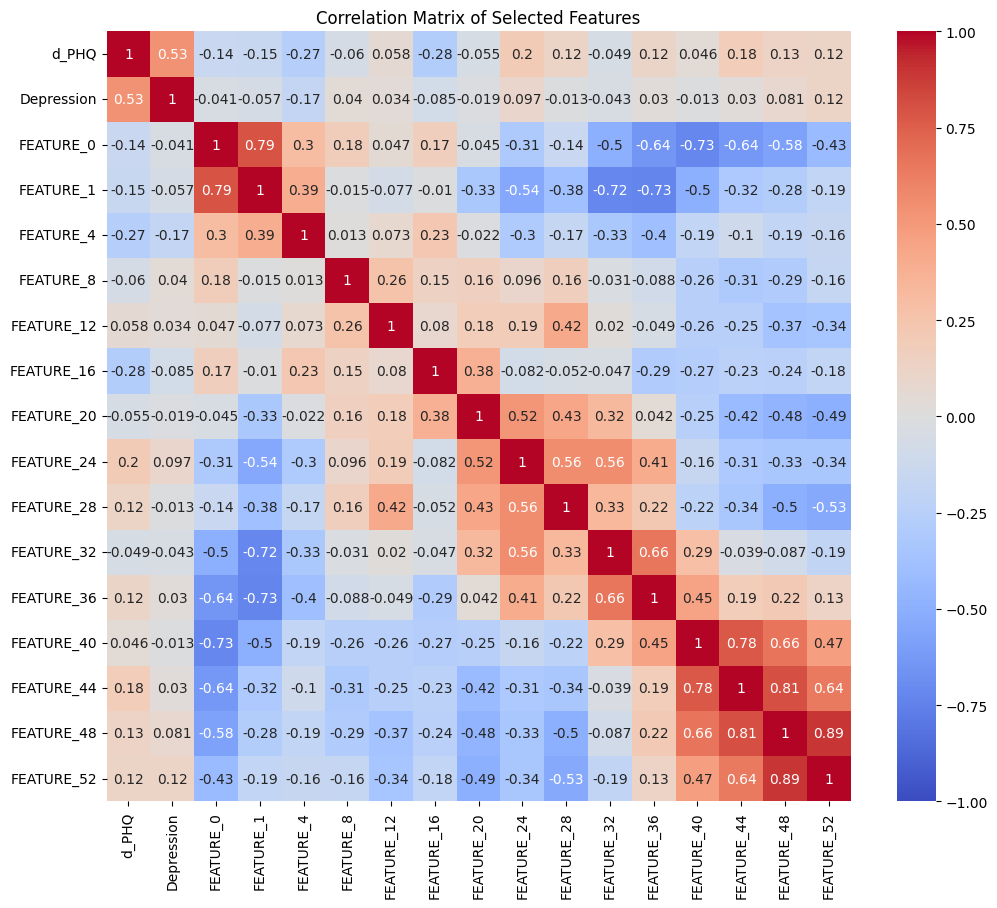

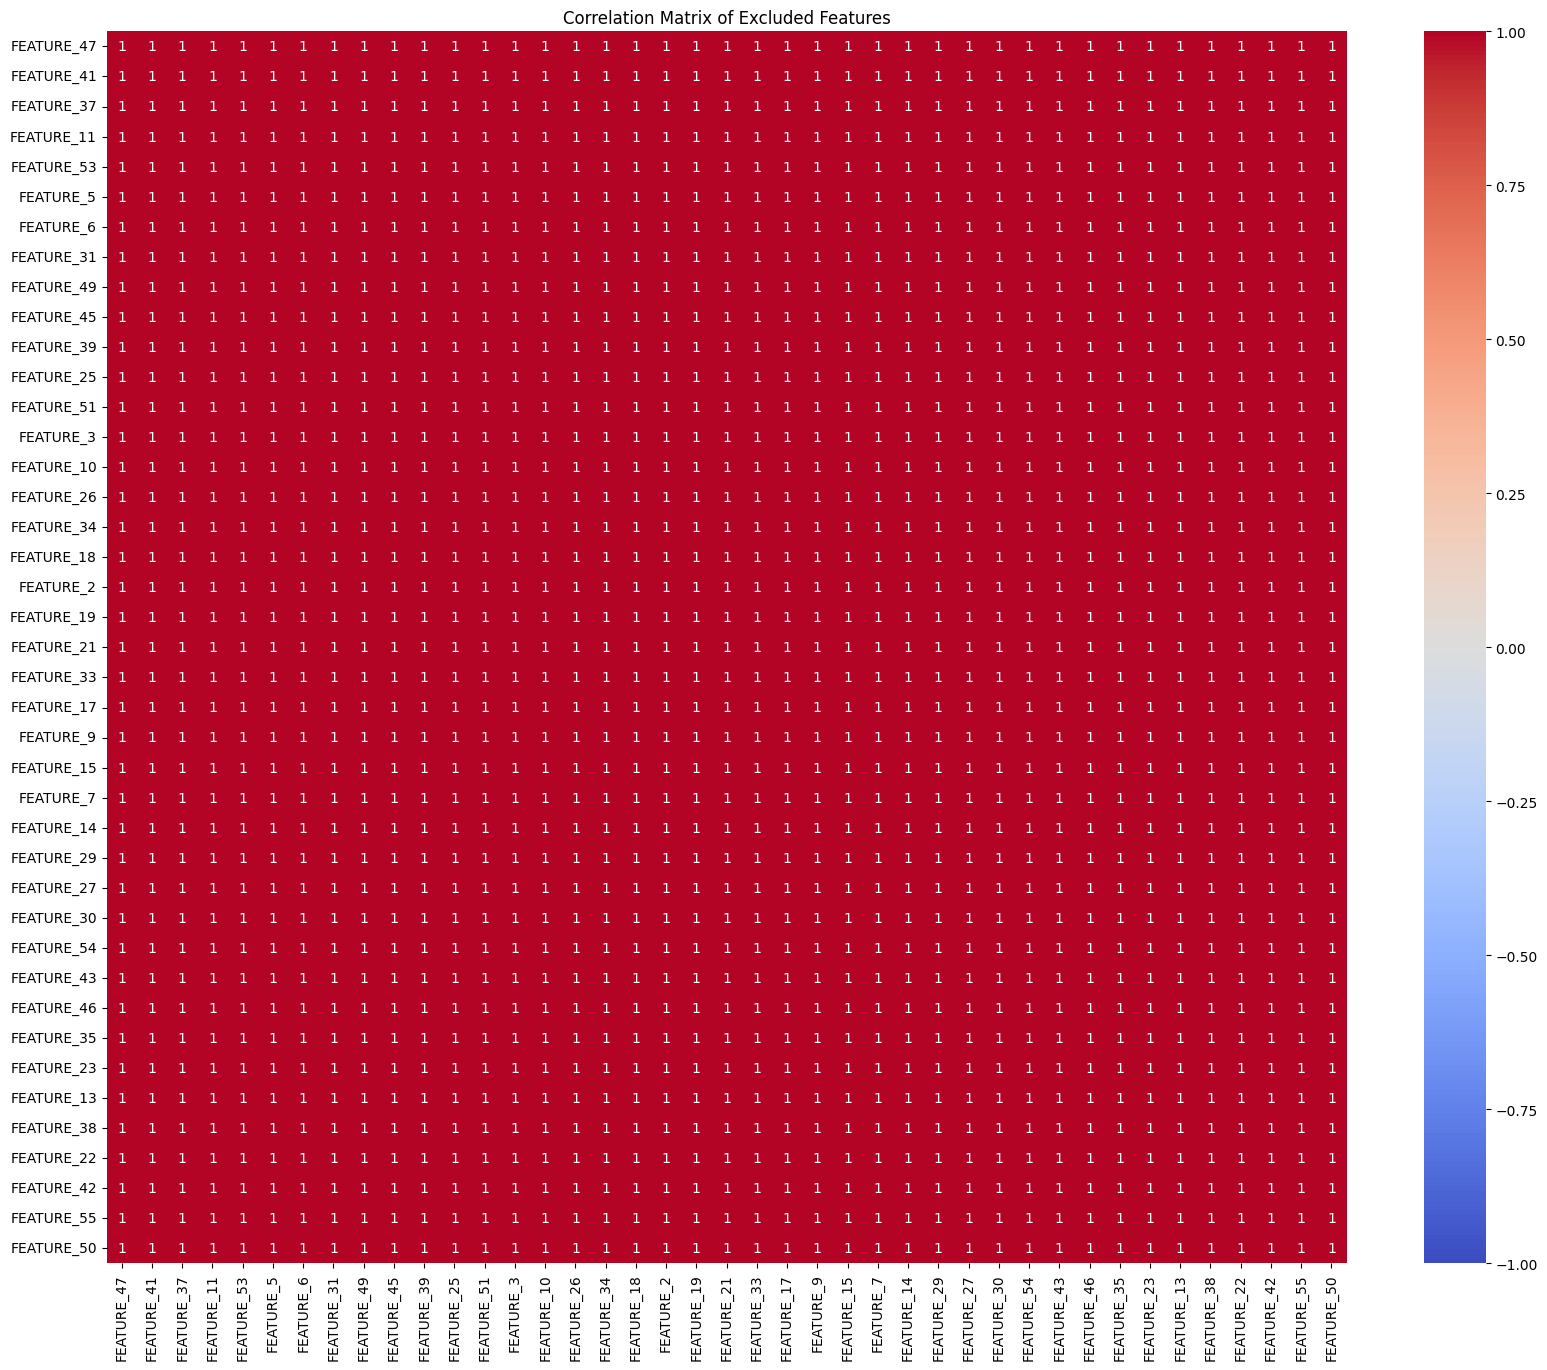

Selected Features: ['d_PHQ', 'Depression', 'FEATURE_0', 'FEATURE_1', 'FEATURE_4', 'FEATURE_8', 'FEATURE_12', 'FEATURE_16', 'FEATURE_20', 'FEATURE_24', 'FEATURE_28', 'FEATURE_32', 'FEATURE_36', 'FEATURE_40', 'FEATURE_44', 'FEATURE_48', 'FEATURE_52']
Excluded Features: ['FEATURE_47', 'FEATURE_41', 'FEATURE_37', 'FEATURE_11', 'FEATURE_53', 'FEATURE_5', 'FEATURE_6', 'FEATURE_31', 'FEATURE_49', 'FEATURE_45', 'FEATURE_39', 'FEATURE_25', 'FEATURE_51', 'FEATURE_3', 'FEATURE_10', 'FEATURE_26', 'FEATURE_34', 'FEATURE_18', 'FEATURE_2', 'FEATURE_19', 'FEATURE_21', 'FEATURE_33', 'FEATURE_17', 'FEATURE_9', 'FEATURE_15', 'FEATURE_7', 'FEATURE_14', 'FEATURE_29', 'FEATURE_27', 'FEATURE_30', 'FEATURE_54', 'FEATURE_43', 'FEATURE_46', 'FEATURE_35', 'FEATURE_23', 'FEATURE_13', 'FEATURE_38', 'FEATURE_22', 'FEATURE_42', 'FEATURE_55', 'FEATURE_50']


In [5]:
# apply feature extraction function to the df "df_BP_PHQ_9"
print("df_BP_PHQ_9")
corr_df_BP_PHQ_9, _ = extractor(df_BP_PHQ_9, threshold=0.9)

In [6]:
# copied from output of feature extraction function
selected_features = ['d_PHQ', 'Depression', 'FEATURE_0', 'FEATURE_1', 'FEATURE_4', 'FEATURE_8', 'FEATURE_12', 'FEATURE_16', 'FEATURE_20', 'FEATURE_24', 'FEATURE_28', 'FEATURE_32', 'FEATURE_36', 'FEATURE_40', 'FEATURE_44', 'FEATURE_48', 'FEATURE_52']

# update df by keeping just columns from list of selected features

# update df of df_BP_PHQ_9
df_BP_PHQ_9 = pd.DataFrame(df_BP_PHQ_9)
df_BP_PHQ_9 = df_BP_PHQ_9[selected_features]
display("df_BP_PHQ_9", df_BP_PHQ_9)

# update df of df_MH_PHQ_S
df_MH_PHQ_S = pd.DataFrame(df_MH_PHQ_S)
df_MH_PHQ_S = df_MH_PHQ_S[selected_features]
display("df_MH_PHQ_S", df_MH_PHQ_S)

'df_BP_PHQ_9'

,d_PHQ,Depression,FEATURE_0,FEATURE_1,FEATURE_4,FEATURE_8,FEATURE_12,FEATURE_16,FEATURE_20,FEATURE_24,FEATURE_28,FEATURE_32,FEATURE_36,FEATURE_40,FEATURE_44,FEATURE_48,FEATURE_52
0,0.0,0,5.205929,-0.397361,-0.306940,-0.238983,-0.030431,0.407505,0.357462,0.142476,0.540480,0.600960,1.215494,1.869357,2.066559,2.306194,2.564530
1,0.0,0,5.311490,-0.421422,-0.400367,-0.381833,-0.187870,0.606436,0.589502,0.840707,1.840504,1.627482,1.826688,1.580752,1.670535,1.290862,1.493238
2,0.0,0,3.808431,-0.440436,-0.432669,-0.316666,-0.030030,0.252418,0.112503,0.359378,1.469504,1.724382,1.910820,2.596897,3.045660,2.099064,1.907093
3,0.0,0,2.701386,-0.445227,-0.443911,-0.437506,-0.373673,0.017489,0.249945,0.844994,1.617087,1.959324,2.193178,3.097462,3.022054,2.066844,2.191618
4,0.0,0,5.753521,-0.398478,-0.347353,-0.243615,-0.025405,0.189991,1.486036,1.482111,0.926527,0.754838,1.174413,0.969005,1.128090,1.261476,2.233848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,9.0,1,5.396629,-0.428226,-0.427470,0.120448,-0.071872,0.448725,0.960104,1.196250,2.392391,1.100761,1.474121,1.317410,1.401452,1.307560,1.376272
636,9.0,1,6.506755,-0.343627,-0.341359,-0.291765,-0.215308,0.297626,1.179817,1.151994,1.281792,0.798779,0.746460,0.814596,0.862307,0.967522,0.679287
637,9.0,1,5.707973,-0.404832,-0.398873,-0.192809,-0.314851,1.199478,1.457578,0.668358,2.030943,0.814874,1.027689,1.095448,1.131005,1.291559,1.493592
638,9.0,1,4.626791,-0.463591,-0.441718,0.158300,-0.358760,1.844580,1.481292,1.976823,0.889264,2.103566,1.571748,1.605754,1.397280,1.156152,1.467099


'df_MH_PHQ_S'

,d_PHQ,Depression,FEATURE_0,FEATURE_1,FEATURE_4,FEATURE_8,FEATURE_12,FEATURE_16,FEATURE_20,FEATURE_24,FEATURE_28,FEATURE_32,FEATURE_36,FEATURE_40,FEATURE_44,FEATURE_48,FEATURE_52
0,0.0,0,5.605602,-0.406609,-0.405615,-0.328237,-0.351553,0.910539,1.150225,1.409920,2.229328,1.139391,0.921274,0.896583,1.083785,1.426472,1.399759
1,0.0,0,6.559511,-0.341352,-0.329742,-0.156071,-0.130756,0.459774,0.531393,0.493588,1.093824,0.747577,0.874849,0.820266,0.919347,0.986295,1.474644
2,0.0,0,2.776117,-0.419118,-0.379032,-0.236779,-0.348777,0.629105,0.112596,0.340291,0.552662,0.817466,1.448383,2.010955,2.845134,3.398386,3.647138
3,0.0,0,4.155495,-0.453166,-0.449112,-0.313147,-0.125688,0.317309,0.872169,1.123568,1.777631,2.825613,1.936802,2.490975,1.540916,1.512401,1.377323
4,0.0,0,5.935491,-0.370790,-0.242690,-0.320443,-0.334690,0.507687,0.203432,0.637677,1.024098,0.450385,1.047448,1.379831,1.377301,1.653041,2.264254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,27.0,1,5.058712,-0.445300,-0.198749,-0.412035,-0.200104,0.944554,1.730539,1.474638,1.374343,1.494250,1.063073,2.021855,1.329115,1.349662,1.683226
1116,27.0,1,6.402835,-0.361157,-0.339015,-0.239876,0.037329,1.565932,0.755164,0.557427,0.927639,1.121506,0.955442,0.789846,0.738553,0.883975,1.016474
1117,27.0,1,4.651101,-0.429621,-0.429939,-0.231465,-0.185139,0.764649,0.297858,0.780575,0.629065,1.094578,1.536676,2.150863,2.066102,2.331739,2.600286
1118,27.0,1,3.163722,-0.438027,-0.126313,-0.085941,-0.339795,1.159697,0.039694,0.663806,0.992334,0.776263,1.097011,2.421839,2.013509,2.518058,4.116329


##Exploratory data analysis
**Purpose:** Check distributions and own errors


*   check distributions between patients which are depressed (=1) and which are not depressed (=0)
*   Checking of distribution of d_PHQ (either MH_PHQ_S or BP_PHQ_9)
*   Have a look of the Boxplots of selected features and d_PHQ

In [7]:
# Define a function to plot desired aspects of the data

def plot_data(df, df_name):
    # print statistical standard measures for d_phq and depression (min, max mean, ...)
    selected_columns = ['d_PHQ', 'Depression']
    selected_df = df[selected_columns]
    print(selected_df.describe().loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']])

    # histogram d_PHQ
    plt.figure(figsize=(10, 6))
    plt.hist(df['d_PHQ'], bins=30, edgecolor='black')
    plt.title(f'Histogram of d_PHQ in {df_name}')
    plt.xlabel('d_PHQ')
    plt.ylabel('Frequency')
    plt.show()

    # histogram depression
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Depression', data=df)
    plt.title(f'Histogram of Depression in {df_name}')
    plt.xlabel('Depression')
    plt.ylabel('Frequency')
    plt.show()

    # plot Boxplots (all feat. except 'Depression')
    features_except_depression = df.drop(columns=['Depression'])
    plt.figure(figsize=(20, 10))
    sns.boxplot(data=features_except_depression)
    plt.title(f'Boxplots of all numerical variables except Depression in {df_name}')
    plt.xticks(rotation=90)
    plt.show()

            d_PHQ  Depression
count  640.000000  640.000000
mean     4.500000    0.875000
std      3.204066    0.330978
min      0.000000    0.000000
25%      1.750000    1.000000
50%      4.500000    1.000000
75%      7.250000    1.000000
max      9.000000    1.000000


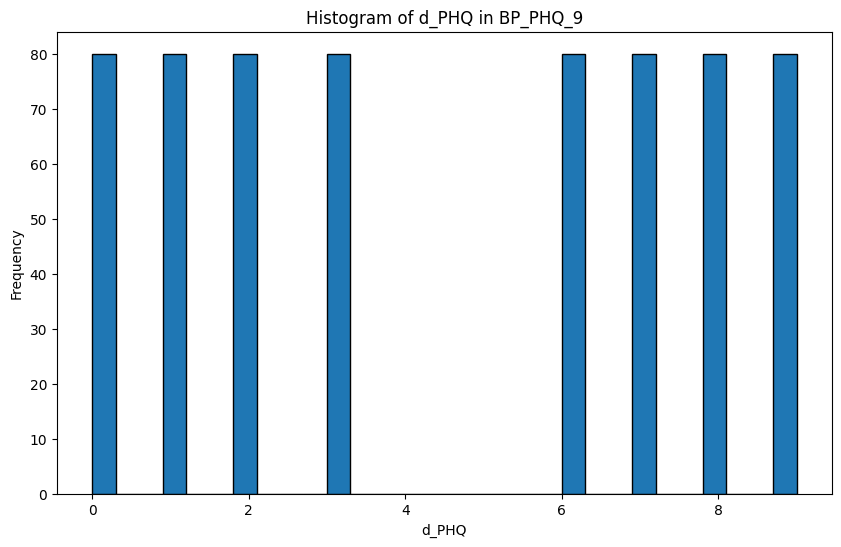

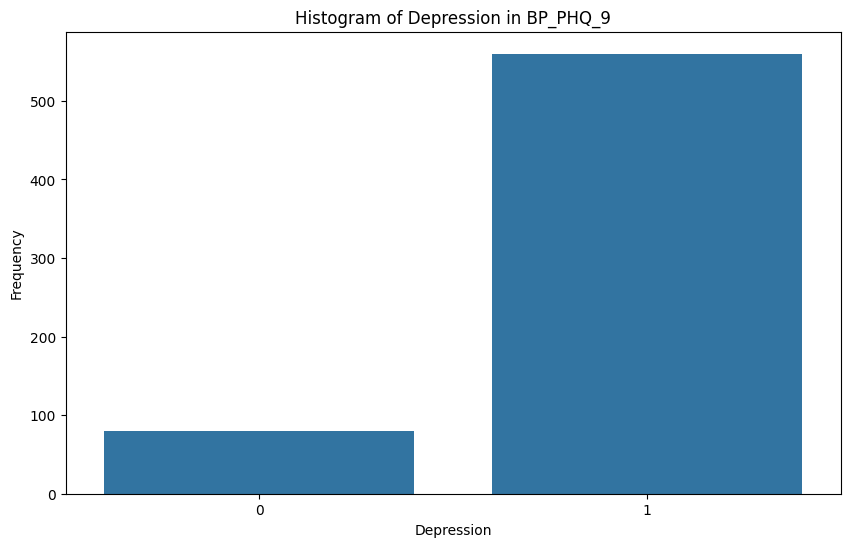

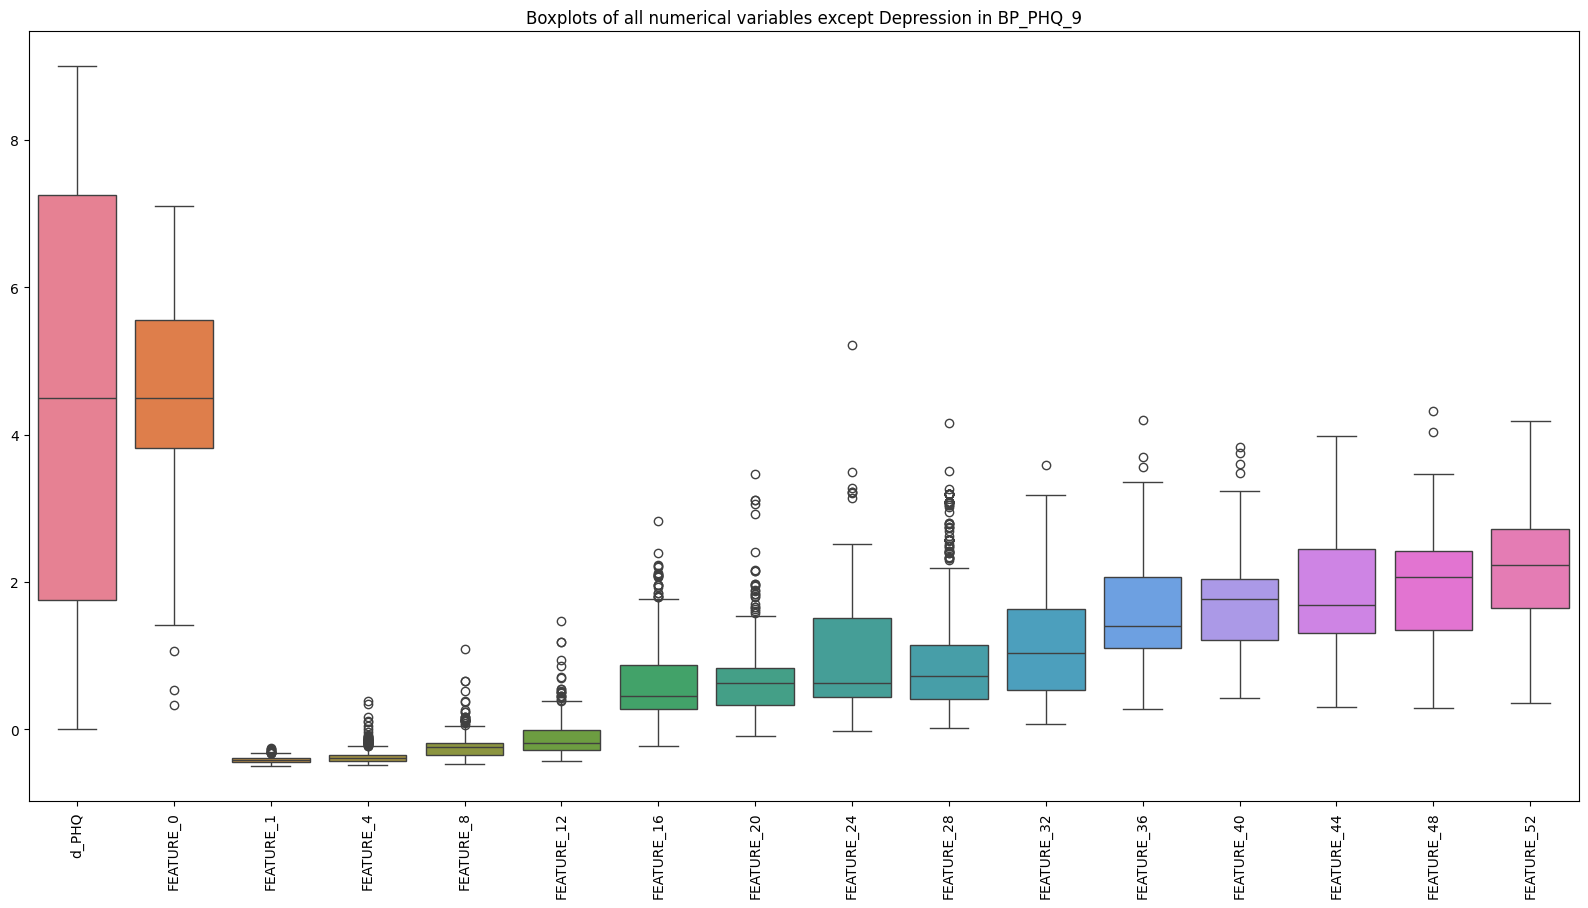

In [8]:
# call the plotting function for the dataset BP_PHQ_9
plot_data(df_BP_PHQ_9, "BP_PHQ_9")

             d_PHQ   Depression
count  1120.000000  1120.000000
mean     13.500000     0.535714
std       8.081356     0.498946
min       0.000000     0.000000
25%       6.750000     0.000000
50%      13.500000     1.000000
75%      20.250000     1.000000
max      27.000000     1.000000


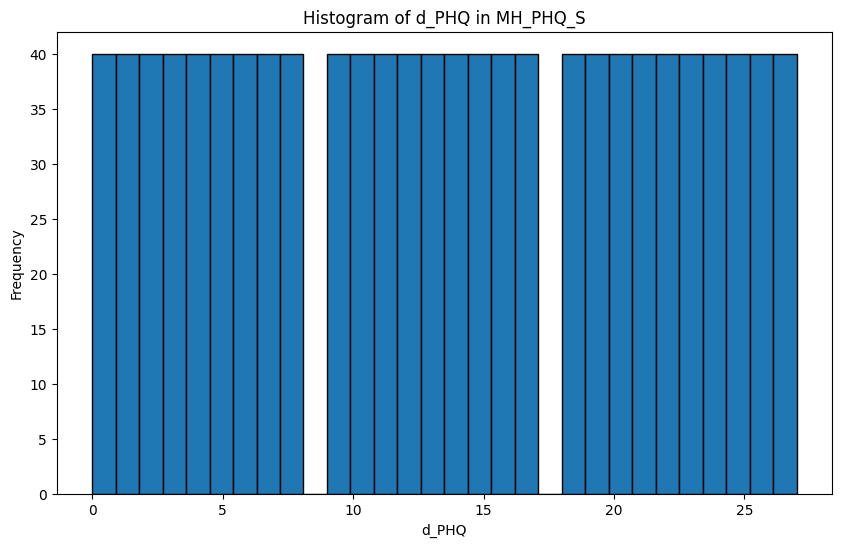

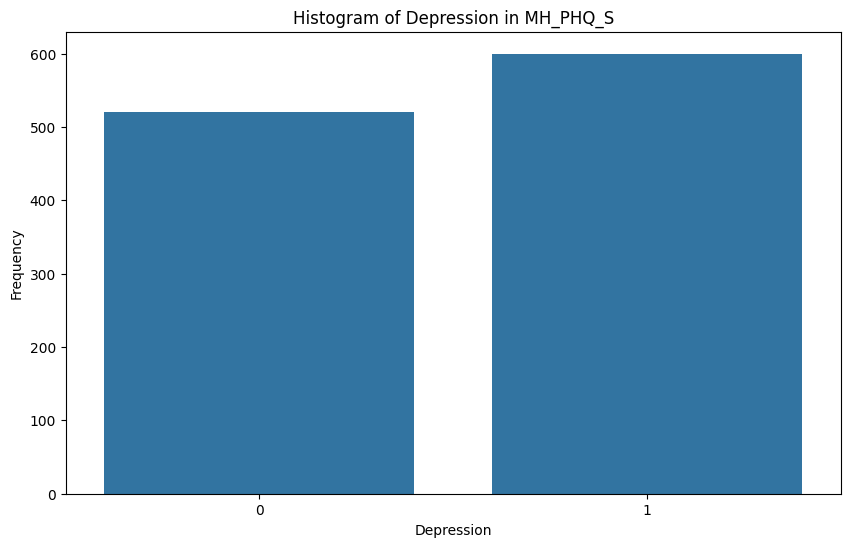

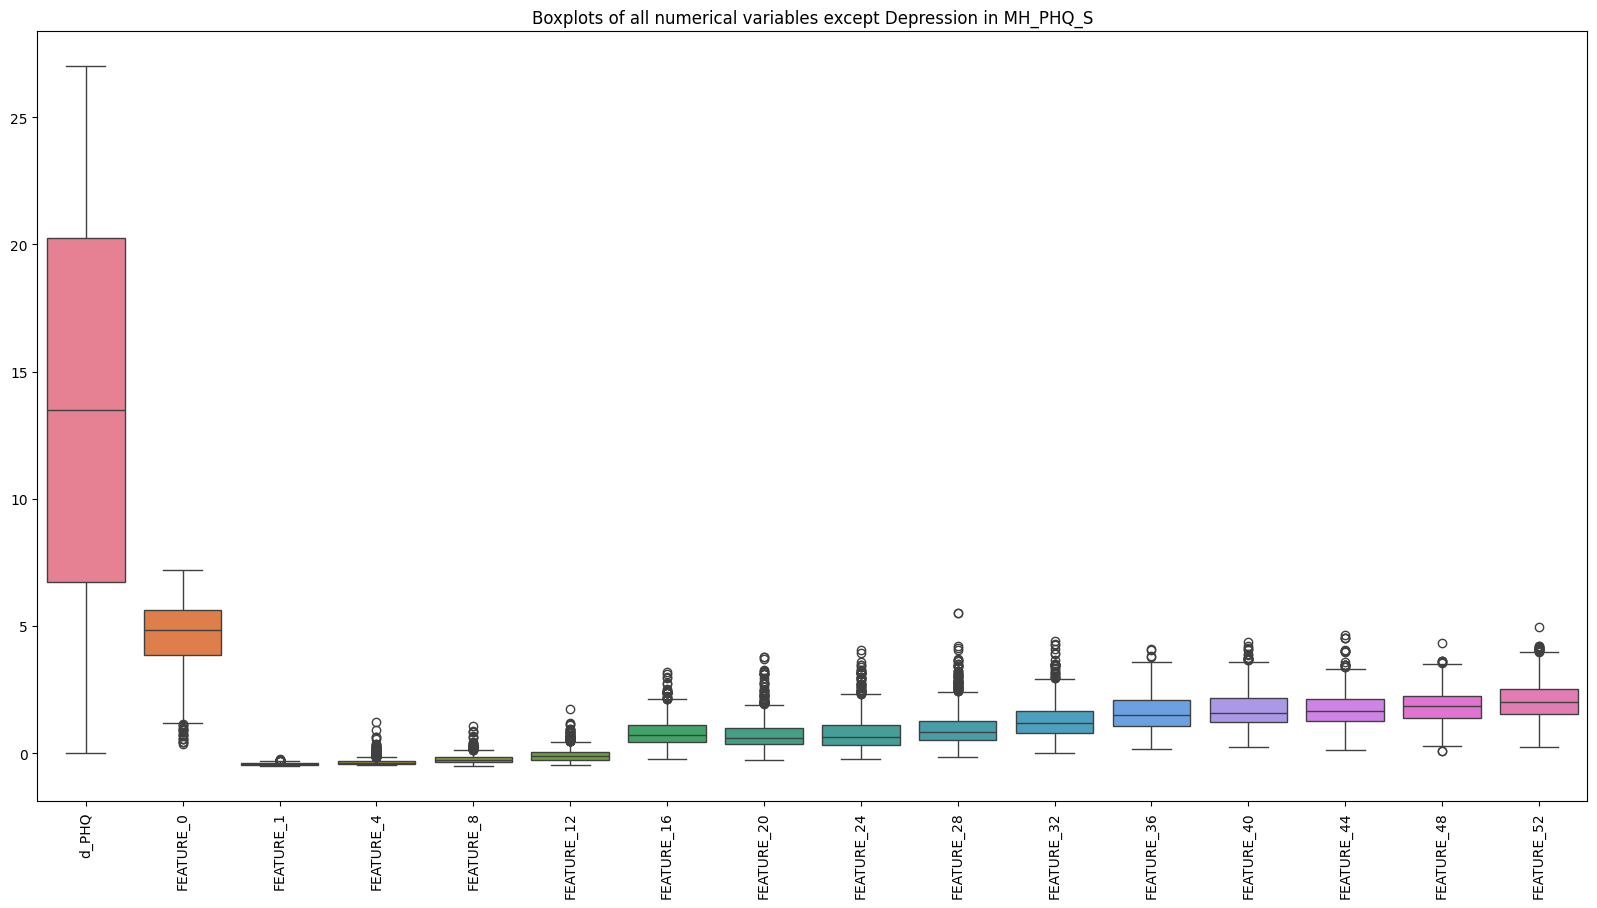

In [9]:
# call the plotting function for the dataset MH_PHQ_S
plot_data(df_MH_PHQ_S, "MH_PHQ_S")

##Balance data sets
**Purpose:** Make Datasets more balanced in terms of distribution of patients with depression respectiveley non-depression

**Procedure:**


1.   Get specific balances for better training results (e.g. less overfitting, better Recall and overall performance)
2.   Divide dataset into 2 datasets, one contains just depression = 1 and the other depression = 0
3.   Apply bootstrapping or random sampling to alter both datasets
4.   Concatenate both subdatasets to one final dataset

In [10]:
# Alter PH_PHQ_9 to get 56/44 balance

# create firs df (contains just depression=0)
df0 = df_BP_PHQ_9[df_BP_PHQ_9['Depression'] == 0]
df0 = df0.sample(n=280, replace=True, random_state=1)

# create df, which contains just depression=1
df1 = df_BP_PHQ_9[df_BP_PHQ_9['Depression'] == 1]
df1 = df1.sample(n=220, replace=False, random_state=1)

# concatenate sub dataframes to final BP_PHQ_9 dataset
df_BP_PHQ_9 = pd.concat([df1, df0])

# last check of dist + print
count_df_BP_PHQ_9 = df_BP_PHQ_9['Depression'].value_counts()
print("count_df_BP_PHQ_9", count_df_BP_PHQ_9)



# Alter MH_PHQ_S to get 44/56 balance

# create firs df (contains just depression=0)
df_0 = df_MH_PHQ_S[df_MH_PHQ_S['Depression'] == 0]
df_0 = df_0.sample(n=220, replace=True, random_state=10)

# create df, which contains just depression=1
df_1 = df_MH_PHQ_S[df_MH_PHQ_S['Depression'] == 1]
df_1 = df_1.sample(n=280, replace=True, random_state=10)

# concatenate both sub df's to one final df
df_MH_PHQ_S = pd.concat([df_1, df_0])

# last check of dist + print
count_df_MH_PHQ_S = df_MH_PHQ_S['Depression'].value_counts()
print("count_df_MH_PHQ_S", count_df_MH_PHQ_S)

count_df_BP_PHQ_9 Depression
0    280
1    220
Name: count, dtype: int64
count_df_MH_PHQ_S Depression
1    280
0    220
Name: count, dtype: int64


#Machine Learning
**Define necessary functions**
1.   Define evaluation metrics and plots
2.   Define machine learning function

**Information**
- 3 Machines are assigned to me: Logistic Regression, Lasso and Ridge.

- Until this point the code for all machines (Logistic Regression, Lasso and Ridge which are saved in distinct notebooks) are the same but in the following part the function defined for the training is specific.

- Machine Learning is applied to: **Lasso Regression**

For ridge the same ML function is applied, but with different seetings for scoring to optimize performance or prevent overfitting

In [18]:
# Define a function for evaluation metrics and plots
def print_metrics(y_test, y_pred, y_pred_proba, model_name):
    print(f"Metrics for {model_name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, y_pred_proba))
    print("\n")

    # plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # plot ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_test, y_pred_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

**Call functions**

1.   Train and test the models
2.   Generate evaluation metrics and plots for models


Metrics for Logistic Regression with Lasso (L1) Regularization - BP_PHQ_9:
Accuracy: 0.8
Precision: 0.7948717948717948
Recall: 0.7209302325581395
F1-Score: 0.7560975609756098
AUC: 0.8425132598939208




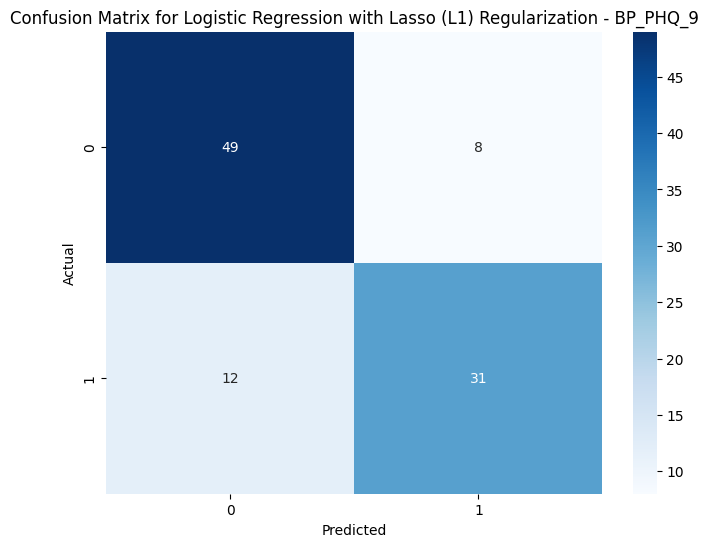

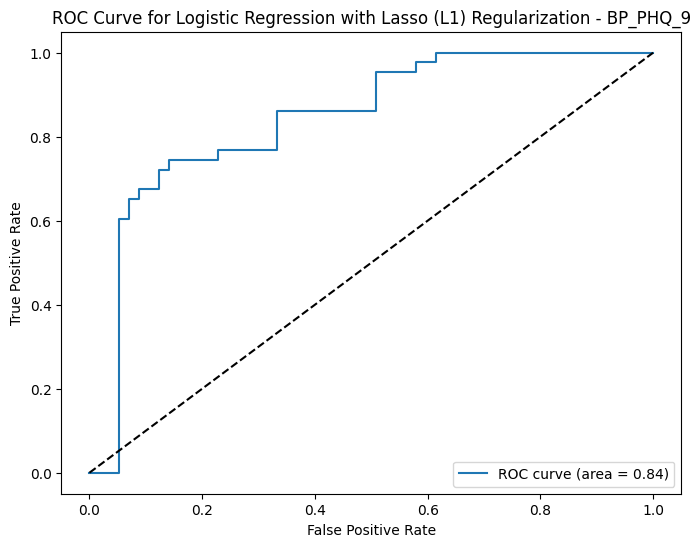

In [21]:
# define function for lasso regression --> better overall performance
def train_logistic_regression_lasso_recall(selected_df, model_name, max_iterations=3000, test_size=0.2):
    #for testing
    #sampled_df = selected_df.sample(n=1000, random_state=42)

    # for application of whole data
    sampled_df = selected_df

    # Define features and output variable
    X = sampled_df.drop(['d_PHQ', 'Depression'], axis=1)
    y = sampled_df['Depression']

    # Split into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=36)

    # Hyperparameter tuning for logistic regression with Lasso (L1-regularization)
    param_grid_lasso = {
        'penalty': ['l1'],
        'C': np.logspace(-4, 4, 20),
        'solver': ['liblinear', 'saga']
    }

    log_reg_lasso = LogisticRegression(max_iter=max_iterations)
    grid_search_lasso = GridSearchCV(log_reg_lasso, param_grid_lasso, cv=5, scoring='recall', n_jobs=-1)
    grid_search_lasso.fit(X_train, y_train)

    # Find best model and evaluate it
    y_pred_lasso = grid_search_lasso.predict(X_test)
    y_pred_proba_lasso = grid_search_lasso.predict_proba(X_test)[:, 1]

    # Print metrics
    print_metrics(y_test, y_pred_lasso, y_pred_proba_lasso, f"Logistic Regression with Lasso (L1) Regularization - {model_name}")

train_logistic_regression_lasso_recall(df_BP_PHQ_9, "BP_PHQ_9", max_iterations=3000)

Metrics for Logistic Regression with Lasso (L1) Regularization - MH_PHQ_S:
Accuracy: 0.66
Precision: 0.6811594202898551
Recall: 0.7966101694915254
F1-Score: 0.7343750000000001
AUC: 0.7755270773046713




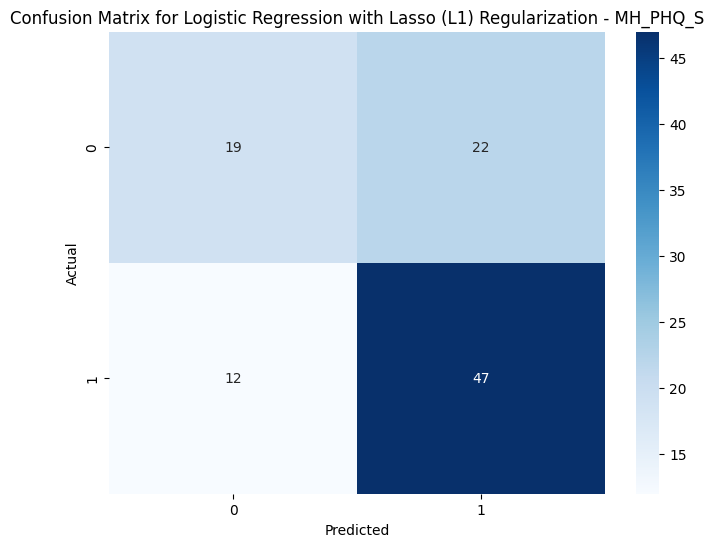

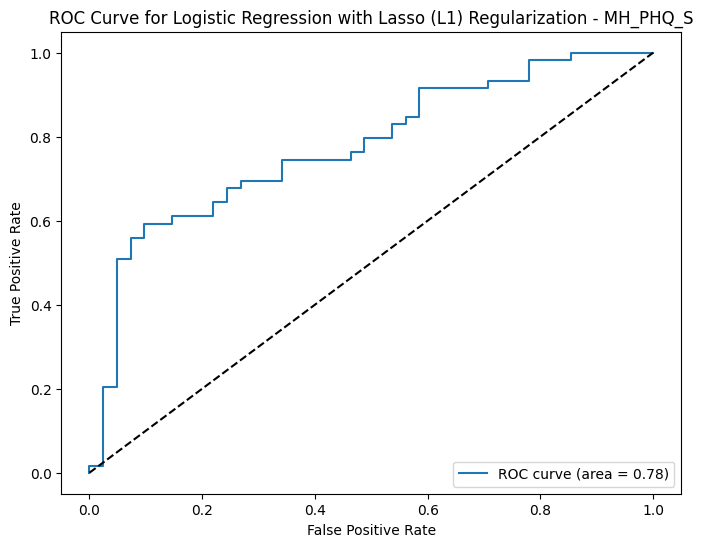

In [20]:
# define function for lasso regression--> prevent overfitting
def train_logistic_regression_lasso_accuracy(selected_df, model_name, max_iterations=3000, test_size=0.2):
    #for testing
    #sampled_df = selected_df.sample(n=1000, random_state=42)

    # for application of whole data
    sampled_df = selected_df

    # Define features and output variable
    X = sampled_df.drop(['d_PHQ', 'Depression'], axis=1)
    y = sampled_df['Depression']

    # Split into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=36)

    # Hyperparameter tuning for logistic regression with Lasso (L1-regularization)
    param_grid_lasso = {
        'penalty': ['l1'],
        'C': np.logspace(-4, 4, 20),
        'solver': ['liblinear', 'saga']
    }

    log_reg_lasso = LogisticRegression(max_iter=max_iterations)
    grid_search_lasso = GridSearchCV(log_reg_lasso, param_grid_lasso, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search_lasso.fit(X_train, y_train)

    # Find best model and evaluate it
    y_pred_lasso = grid_search_lasso.predict(X_test)
    y_pred_proba_lasso = grid_search_lasso.predict_proba(X_test)[:, 1]

    # Print metrics
    print_metrics(y_test, y_pred_lasso, y_pred_proba_lasso, f"Logistic Regression with Lasso (L1) Regularization - {model_name}")


train_logistic_regression_lasso_accuracy(df_MH_PHQ_S, "MH_PHQ_S", max_iterations=3000)